# **PROJECT TITLE**

### HR ANALYTICS: PREDICTING EMPLOYEE EXIT AND RETENTION FOR ALPHA NETWORK LIMITED

## **Objectives**  
Use python to analyse HR data to:
- Understand Employee records patterns. 
- Identify factors that correlate employee exit.
- Predict employees likely to exit in the next 6 months.
- Calculate exit probabilities for new hires
- Generate insights to improve retention and workforce planning.

### **Importing Libraries**

In [153]:
# Importing pandas and numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.metrics import precision_score, recall_score
from xgboost import XGBClassifier

## **1. Data Loading & Inspection**
---

In [154]:
# Loading data into notebook
df = pd.read_csv("Employee Records.csv")

In [155]:
 #Displaying Basic Information
df.head(10)

,Job Title,Department,Age,Gender,Marital Status,Years of Service,Mode of Exit,Date of Exit,Reasons For Exit,Salary,Status
0,Data Scientist,Billing,31,Male,Single,3,NaN,NaN,NaN,359.750000,0
1,Product Manager,Sales & Marketing,27,Male,Married,8,NaN,NaN,NaN,391.880000,0
2,Software Developer,Field Operations,26,Female,Single,7,NaN,NaN,NaN,265.380000,0
3,Customer Support Agent,Network Operations,24,Female,Married,7,NaN,NaN,NaN,305.880000,0
4,Billing Specialist,Data Analytics,43,Male,Married,1,NaN,NaN,NaN,250.750000,0
5,Product Manager,Billing,25,Male,Married,8,NaN,NaN,NaN,127.630000,0
6,Telecom Technician,Sales & Marketing,60,Female,Married,9,Retirement,4/26/2023,Restructuring,354.666667,1
7,Product Manager,Project Management,44,Male,Married,5,NaN,NaN,NaN,149.790000,0
8,Software Developer,Customer Service,41,Female,Married,4,NaN,NaN,NaN,305.670000,0
9,Software Developer,Field Operations,45,Male,Married,6,NaN,NaN,NaN,590.790000,0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Title         4320 non-null   object 
 1   Department        4320 non-null   object 
 2   Age               4320 non-null   int64  
 3   Gender            4320 non-null   object 
 4   Marital Status    4320 non-null   object 
 5   Years of Service  4320 non-null   int64  
 6   Mode of Exit      820 non-null    object 
 7   Date of Exit      820 non-null    object 
 8   Reasons For Exit  820 non-null    object 
 9   Salary            4320 non-null   float64
 10  Status            4320 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 371.4+ KB


In [157]:
null_values = df.isna().sum()
print(null_values)

Job Title              0
Department             0
Age                    0
Gender                 0
Marital Status         0
Years of Service       0
Mode of Exit        3500
Date of Exit        3500
Reasons For Exit    3500
Salary                 0
Status                 0
dtype: int64


In [158]:
df.describe()

,Age,Years of Service,Salary,Status
count,4320.000000,4320.000000,4320.000000,4320.000000
mean,40.621991,4.970602,356.478967,0.189815
std,11.698078,2.287774,133.442016,0.392200
min,22.000000,1.000000,125.080000,0.000000
25%,30.000000,3.000000,258.035000,0.000000
50%,40.000000,5.000000,346.956667,0.000000
75%,51.000000,7.000000,437.550000,0.000000
max,60.000000,10.000000,749.080000,1.000000


## **2. Data Cleaning**
---

### **2.1 Correct Datatypes**

In [159]:
# Changing data type (Object type to category)
category_column = df.select_dtypes(include ="object").columns.tolist()
for columns in category_column:
    df[columns]= df[columns].astype("category")

In [160]:
# changing the data type for date of exit
df['Date of Exit'] = pd.to_datetime(df['Date of Exit'])

### **2.2 Handling Missing Values**

In [161]:
# Handling missing values
df['Mode of Exit'] = df['Mode of Exit'].cat.add_categories('Active')
df['Mode of Exit'] = df['Mode of Exit'].fillna('Active')
df['Reasons For Exit'] = df['Reasons For Exit'].cat.add_categories('Active')
df['Reasons For Exit'] = df['Reasons For Exit'].fillna('Active')

In [162]:
df.head()

,Job Title,Department,Age,Gender,Marital Status,Years of Service,Mode of Exit,Date of Exit,Reasons For Exit,Salary,Status
0,Data Scientist,Billing,31,Male,Single,3,Active,NaT,Active,359.75,0
1,Product Manager,Sales & Marketing,27,Male,Married,8,Active,NaT,Active,391.88,0
2,Software Developer,Field Operations,26,Female,Single,7,Active,NaT,Active,265.38,0
3,Customer Support Agent,Network Operations,24,Female,Married,7,Active,NaT,Active,305.88,0
4,Billing Specialist,Data Analytics,43,Male,Married,1,Active,NaT,Active,250.75,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Job Title         4320 non-null   category      
 1   Department        4320 non-null   category      
 2   Age               4320 non-null   int64         
 3   Gender            4320 non-null   category      
 4   Marital Status    4320 non-null   category      
 5   Years of Service  4320 non-null   int64         
 6   Mode of Exit      4320 non-null   category      
 7   Date of Exit      820 non-null    datetime64[ns]
 8   Reasons For Exit  4320 non-null   category      
 9   Salary            4320 non-null   float64       
 10  Status            4320 non-null   int64         
dtypes: category(6), datetime64[ns](1), float64(1), int64(3)
memory usage: 195.8 KB


### **2.3 Rounding Integer Values**

In [164]:
# rounding integers to 2 decimal place
df['Age'] = df['Age'].round().astype('Int64')
df['Years of Service'] = df['Years of Service'].round().astype('Int64')

### **2.4 Handling Duplicate Values**

In [165]:
# Checking For Duplicates
duplicates = df.duplicated()

# Displaying Duplicate Rows
duplicate_rows = df[duplicates]
duplicate_rows

,Job Title,Department,Age,Gender,Marital Status,Years of Service,Mode of Exit,Date of Exit,Reasons For Exit,Salary,Status


## **3. Visualizations**
---

In [166]:
# Define numeric and categorical feature columns
num_feats = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_feats = df.select_dtypes(include='category').columns.tolist()

### 3.1 Distributions

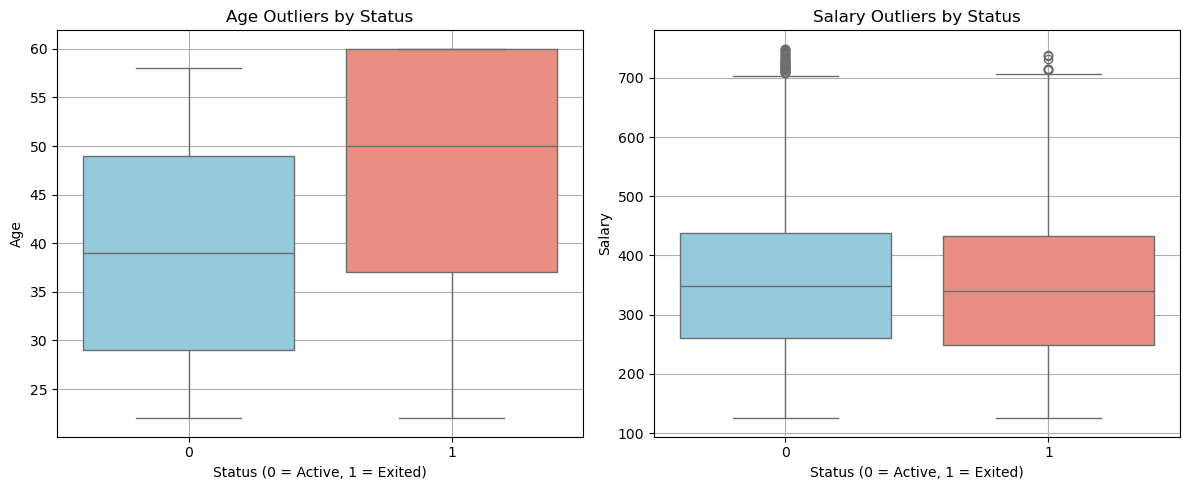

In [167]:
# Age Outliers
# Ensure Status is treated as integer for consistency
df['Status'] = df['Status'].astype(int)

# Define palette with matching integer keys
custom_colors = {0: 'skyblue', 1: 'salmon'}

plt.figure(figsize=(12, 5))

# Age Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Status', y='Age', data=df, hue='Status', palette=custom_colors, dodge=False)
plt.title("Age Outliers by Status")
plt.xlabel("Status (0 = Active, 1 = Exited)")
plt.ylabel("Age")
plt.legend([], [], frameon=False)
plt.grid(True)

# Salary Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Salary', data=df, hue='Status', palette=custom_colors, dodge=False)
plt.title("Salary Outliers by Status")
plt.xlabel("Status (0 = Active, 1 = Exited)")
plt.ylabel("Salary")
plt.legend([], [], frameon=False)
plt.grid(True)

plt.tight_layout()
plt.show()

### Boxplot Summary: Age & Salary by Status

These boxplots compare **Age** and **Salary** between Active and Exited staff, including outliers.

- **Age**: Exited employees tend to be older, with a median closer to 60 likely due to retirement.
- **Salary**: Active staff show more high-salary outliers, while exited staff have a slightly more balanced salary range.

Outliers were kept to show the full range and variation in the data.

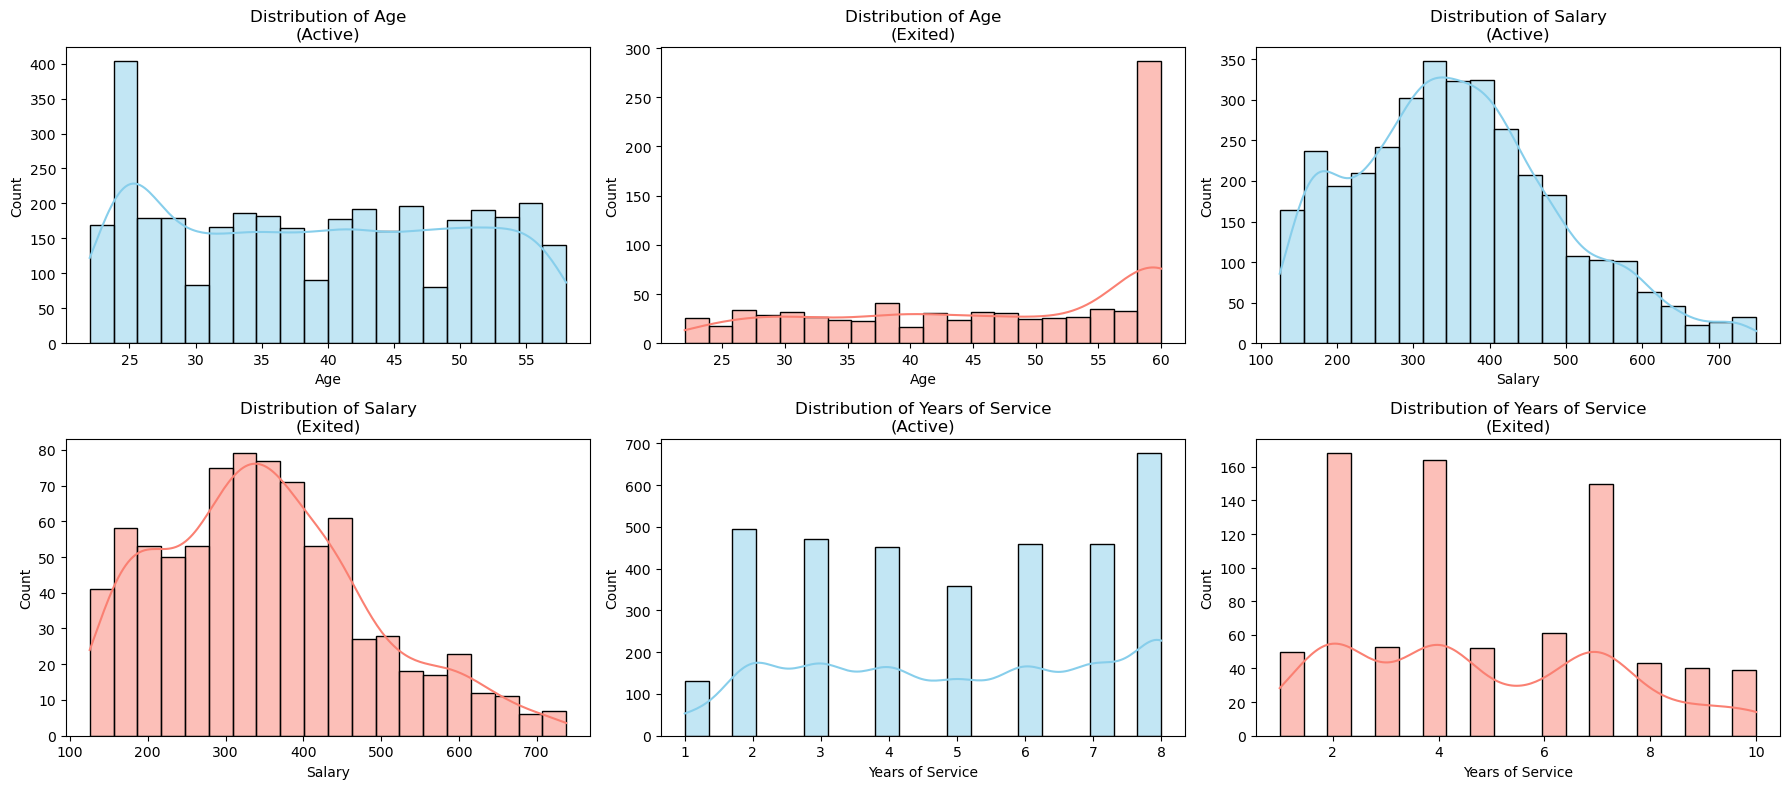

In [168]:
# Features to plot
num_feats = ['Age', 'Salary', 'Years of Service']
statuses = [0, 1]

# Set up 2 rows × 3 columns grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()  # Flatten to loop easily
# Loop through features and status combinations
plot_idx = 0
for col in num_feats:
    for status in statuses:
        subset = df[df['Status'] == status]
        color = 'skyblue' if status == 0 else 'salmon'
        title = f'{col} - {"Active" if status == 0 else "Exited"}'

        sns.histplot(
            data=subset,
            x=col,
            kde=True,
            bins=20,
            color=color,
            ax=axes[plot_idx]
        )
        axes[plot_idx].set_title(f'Distribution of {col}\n({ "Active" if status == 0 else "Exited" })')
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Count')
        axes[plot_idx].grid(False)

        plot_idx += 1

# Adjust spacing
plt.tight_layout()
plt.show()

### 🧾 Distribution Insights

The histograms above provide a side-by-side comparison of three key employee attributes — **Age**, **Salary**, and **Years of Service** — split by **employment status** (Active vs Exited):

- **Age Distribution**:
  - Active employees are fairly distributed across age groups from 25 to 60, with a noticeable peak around age 25.
  - Exited employees, however, show a steep rise toward age 60, suggesting a strong exit trend among older staff — likely due to retirement.

- **Salary Distribution**:
  - Active staff salaries are skewed toward the higher end, with most earning between 300–450.
  - Exited staff have a broader salary spread, with a slightly left-skewed distribution — indicating exits happen across salary bands, but more commonly at mid-level incomes.

- **Years of Service**:
  - Active employees are evenly spread across service years, particularly clustered around 2–8 years.
  - Exited employees show spikes at specific years (e.g., 2, 4, 6), suggesting patterns of voluntary exits, terminations, or structural layoffs at certain service milestones.

These visualizations help highlight patterns that can inform HR interventions, such as exit risk by age or salary band.


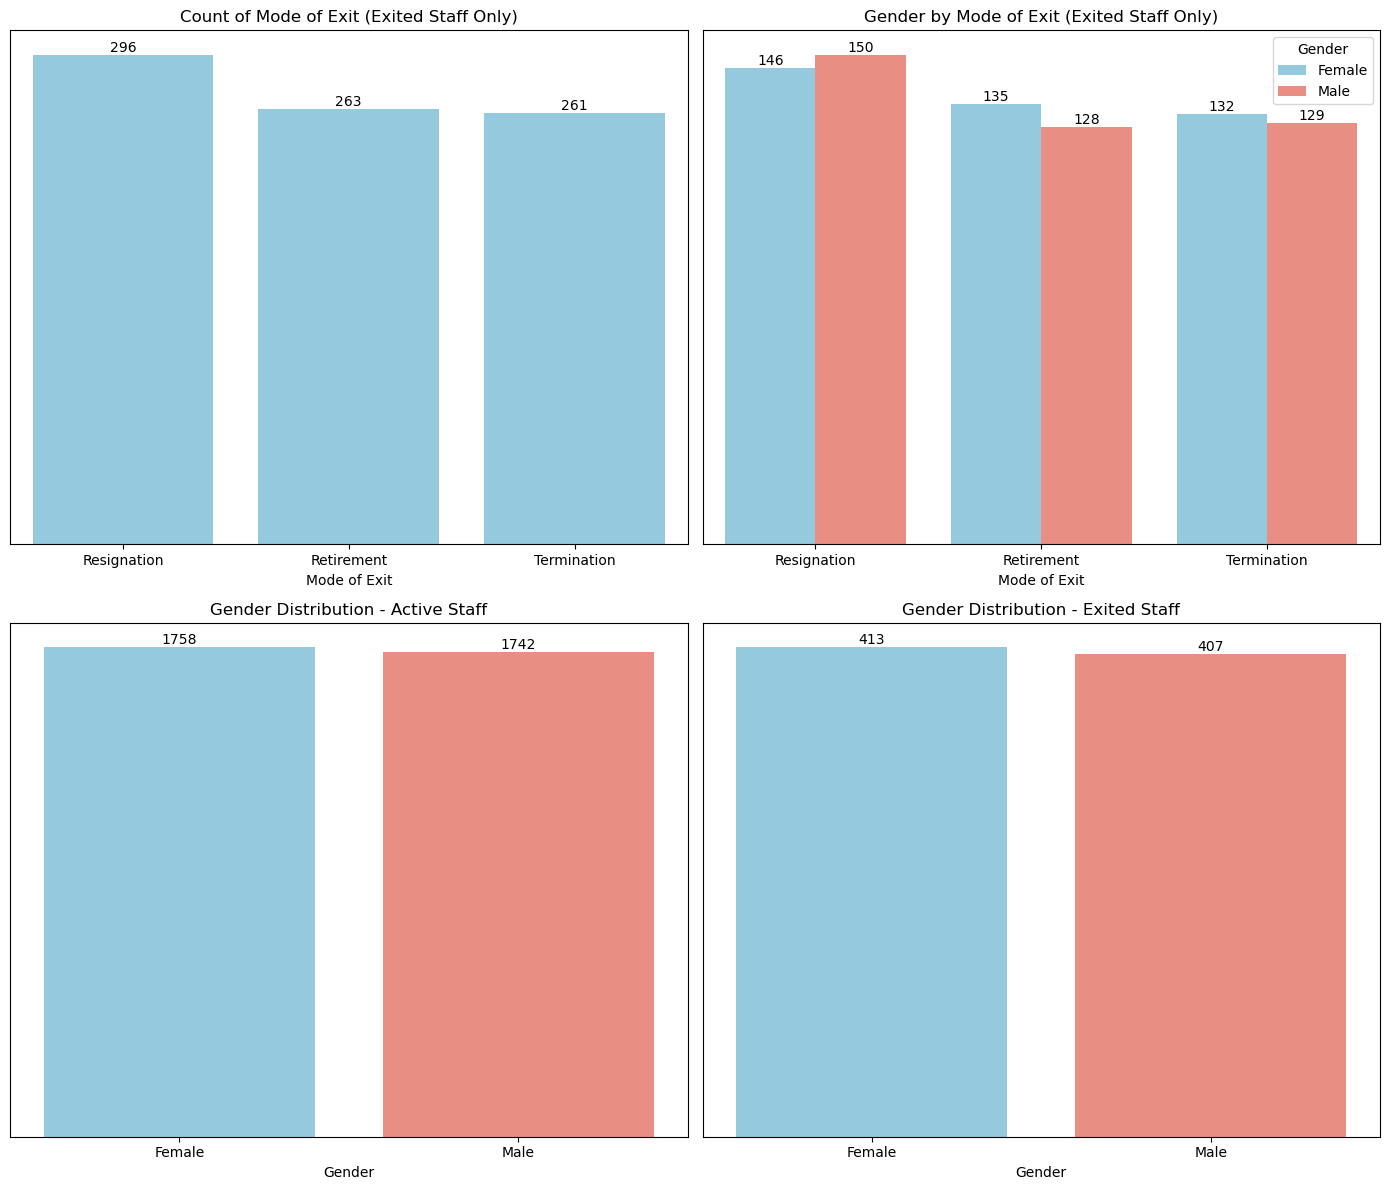

In [169]:
# Create filtered subsets
exits_df = df[df['Status'] == 1].copy()
active_df = df[df['Status'] == 0].copy()

# Drop 'Active' rows and category if Mode of Exit is categorical
if exits_df['Mode of Exit'].dtype.name == 'category':
    exits_df['Mode of Exit'] = exits_df['Mode of Exit'].cat.remove_categories(['Active'])
else:
    exits_df = exits_df[exits_df['Mode of Exit'] != 'Active']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# 1. Count of Mode of Exit
sns.countplot(data=exits_df, x='Mode of Exit', ax=axes[0], color='skyblue')
axes[0].set_title("Count of Mode of Exit (Exited Staff Only)")
axes[0].set_xlabel("Mode of Exit")
axes[0].set_ylabel("")
axes[0].set_yticks([])  # 🔁 remove y-axis
axes[0].grid(False)
axes[0].bar_label(axes[0].containers[0], label_type='edge', fontsize=10)

# 2. Gender by Mode of Exit
custom_palette = {'Female': 'skyblue', 'Male': 'salmon'}
sns.countplot(data=exits_df, x='Mode of Exit', hue='Gender', ax=axes[1], palette=custom_palette)
axes[1].set_title("Gender by Mode of Exit (Exited Staff Only)")
axes[1].set_xlabel("Mode of Exit")
axes[1].set_ylabel("")
axes[1].set_yticks([])
axes[1].grid(False)
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', fontsize=10)

# 3. Gender Distribution - Active
sns.countplot(data=active_df, x='Gender', hue='Gender', ax=axes[2],
              palette=custom_palette, dodge=False, legend=False)
axes[2].set_title("Gender Distribution - Active Staff")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("")
axes[2].set_yticks([])
axes[2].grid(False)
for container in axes[2].containers:
    axes[2].bar_label(container, label_type='edge', fontsize=10)

# 4. Gender Distribution - Exited
sns.countplot(data=exits_df, x='Gender', hue='Gender', ax=axes[3],
              palette=custom_palette, dodge=False, legend=False)
axes[3].set_title("Gender Distribution - Exited Staff")
axes[3].set_xlabel("Gender")
axes[3].set_ylabel("")
axes[3].set_yticks([])
axes[3].grid(False)
for container in axes[3].containers:
    axes[3].bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()


### Gender & Exit Mode Summary

- **Mode of Exit**: Most staff exited through **resignation**, followed closely by **retirement** and **termination**.
- **Gender Breakdown**: The distribution of exit modes is fairly balanced across genders, with slight variations.
- **Active vs Exited**: Gender representation is almost equal among both active and exited staff, showing no major gender bias in overall attrition.

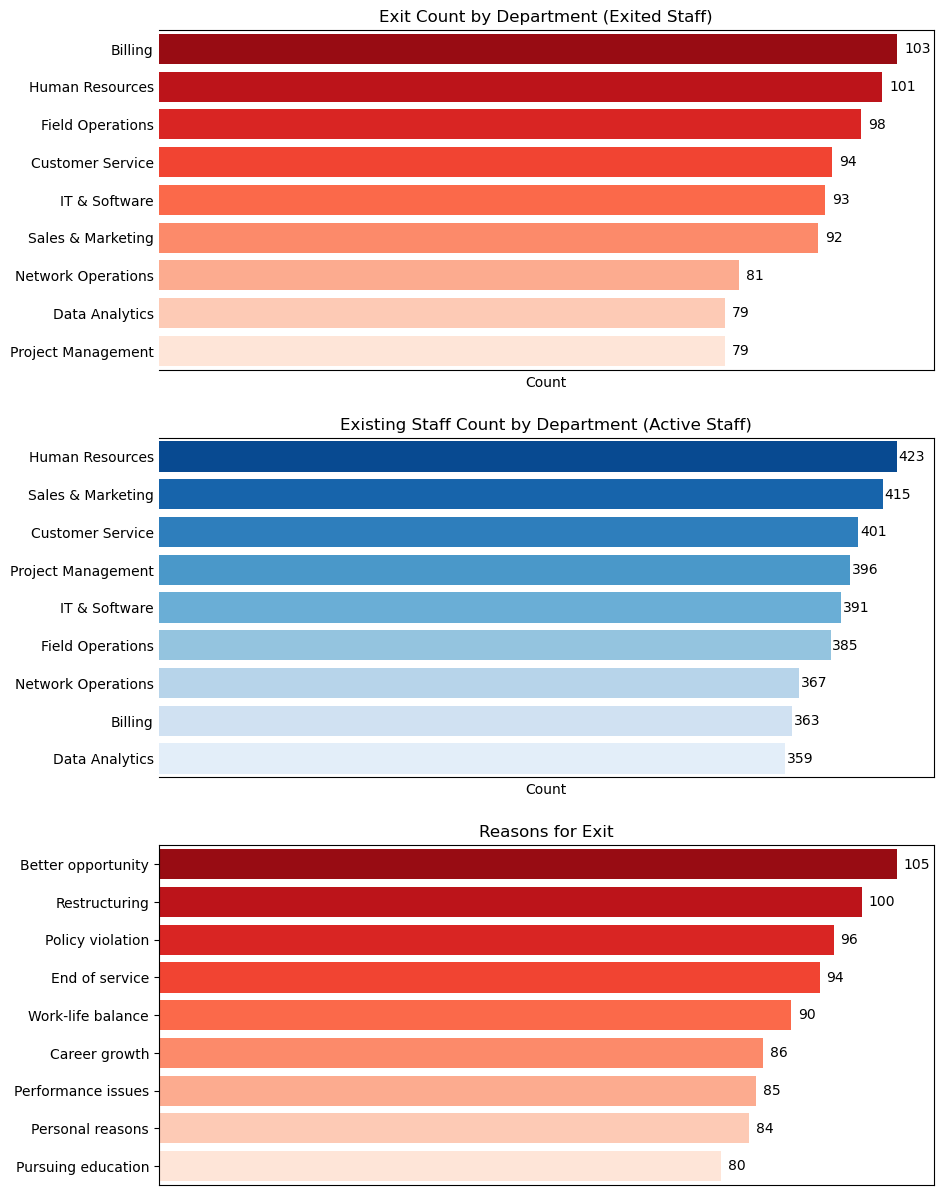

In [170]:
# Filtered DataFrames
exits_df = df[df['Status'] == 1]
active_df = df[df['Status'] == 0]

# Set up layout
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# --- 1. Exit Count by Department ---
dept_counts_exit = exits_df['Department'].value_counts()
dept_order_exit = dept_counts_exit.index
sns.countplot(data=exits_df, y="Department", order=dept_order_exit, ax=axes[0])
reds = sns.color_palette("Reds", n_colors=len(dept_order_exit))[::-1]  # reverse gradient
for i, (bar, count) in enumerate(zip(axes[0].patches, dept_counts_exit.values)):
    bar.set_facecolor(reds[i])
    axes[0].text(count + 1, bar.get_y() + bar.get_height()/2, str(count), va='center')

axes[0].set_title("Exit Count by Department (Exited Staff)")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("")
axes[0].tick_params(axis='y', length=0)
axes[0].spines['left'].set_visible(False)
axes[0].grid(False, axis='x')
axes[0].set_xticks([])

# --- 2. Existing Staff by Department ---
dept_counts_active = active_df['Department'].value_counts()
dept_order_active = dept_counts_active.index
sns.countplot(data=active_df, y="Department", order=dept_order_active, ax=axes[1])
blues = sns.color_palette("Blues", n_colors=len(dept_order_active))[::-1]
for i, (bar, count) in enumerate(zip(axes[1].patches, dept_counts_active.values)):
    bar.set_facecolor(blues[i])
    axes[1].text(count + 1, bar.get_y() + bar.get_height()/2, str(count), va='center')
axes[1].set_title("Existing Staff Count by Department (Active Staff)")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")
axes[1].tick_params(axis='y', length=0)
axes[1].spines['left'].set_visible(False)
axes[1].grid(False, axis='x')
axes[1].set_xticks([])

# --- 3. Reasons for Exit ---
# Filter and clean category in one step
reasons_filtered = exits_df[exits_df['Reasons For Exit'] != 'Active'].copy()
reasons_filtered['Reasons For Exit'] = reasons_filtered['Reasons For Exit'].astype(str)

# Plot
reason_order = reasons_filtered['Reasons For Exit'].value_counts().index
sns.countplot(data=reasons_filtered, y="Reasons For Exit", order=reason_order, ax=axes[2])
reason_colors = sns.color_palette("Reds", n_colors=len(reason_order))[::-1]

# Apply color and labels
for bar, color in zip(axes[2].patches, reason_colors):
    bar.set_facecolor(color)
    width = bar.get_width()
    axes[2].text(width + 1, bar.get_y() + bar.get_height()/2,
                 f'{int(width)}', va='center', fontsize=10)
axes[2].set_title("Reasons for Exit")
axes[2].set_xlabel("")
axes[2].set_ylabel("")
axes[2].set_xticks([])
axes[2].grid(False)

### 🏢 Department & Exit Reasons Summary

- **Exits by Department**: Billing and Human Resources had the highest number of exits, suggesting possible issues in those units.
- **Active Staff**: Departments like HR and Sales & Marketing also have the largest active headcount, showing their strategic size.
- **Top Exit Reasons**: Most employees left for better opportunities, followed by restructuring and policy violations.

These trends can help HR focus retention efforts on specific departments and reasons.

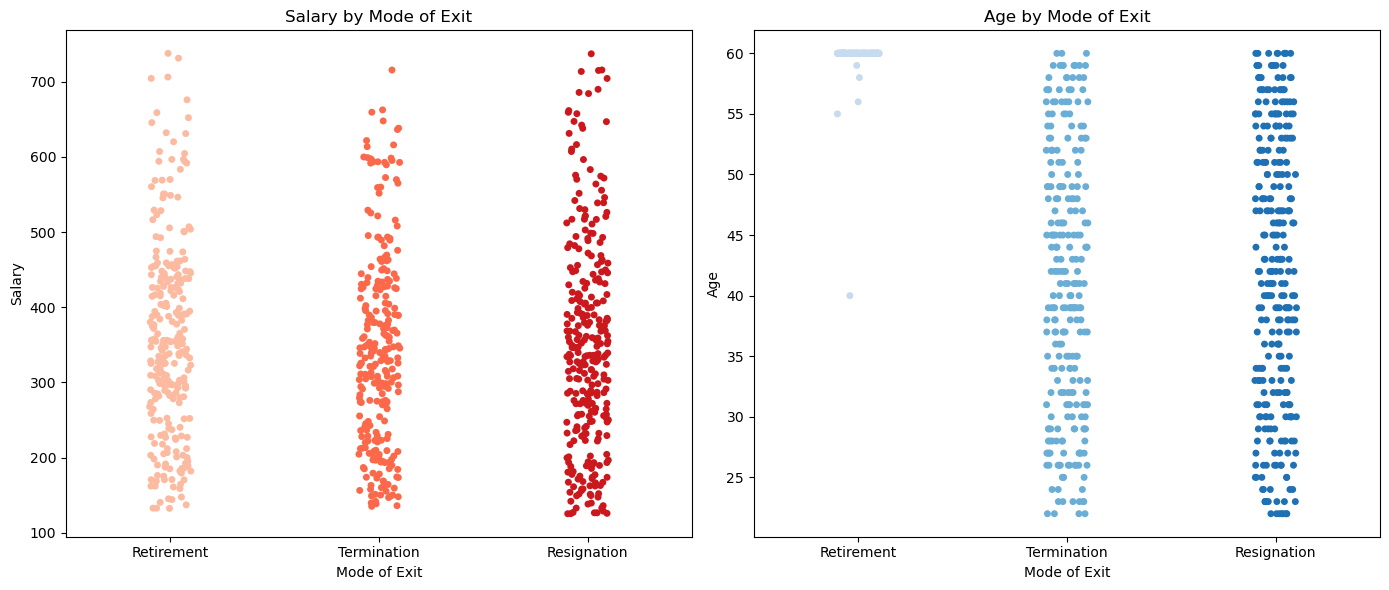

In [171]:
# Filter and prepare
strip_df = df[df['Mode of Exit'] != 'Active'].copy()
strip_df['Mode of Exit'] = strip_df['Mode of Exit'].astype(str)
exit_modes = strip_df['Mode of Exit'].unique()
num_modes = len(exit_modes)

# Assign palettes
reds_palette = sns.color_palette("Reds", n_colors=num_modes)
blues_palette = sns.color_palette("Blues", n_colors=num_modes)
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 3. Salary by Mode of Exit (Reds)
sns.stripplot(
    data=strip_df,
    x='Mode of Exit',
    y='Salary',
    hue='Mode of Exit',
    palette=dict(zip(exit_modes, reds_palette)),
    jitter=True,
    dodge=False,
    ax=axes[0],
    legend=False
)
axes[0].set_title("Salary by Mode of Exit")
axes[0].set_xlabel("Mode of Exit")
axes[0].set_ylabel("Salary")
axes[0].grid(False)

# 5. Age by Mode of Exit (Blues)
sns.stripplot(
    data=strip_df,
    x='Mode of Exit',
    y='Age',
    hue='Mode of Exit',
    palette=dict(zip(exit_modes, blues_palette)),
    jitter=True,
    dodge=False,
    ax=axes[1],
    legend=False
)
axes[1].set_title("Age by Mode of Exit")
axes[1].set_xlabel("Mode of Exit")
axes[1].set_ylabel("Age")
axes[1].grid(False)

plt.tight_layout()
plt.show()

### Salary & Age by Mode of Exit

- **Salary**: Employees who resigned are spread accross all salary levels, while retirees and terminated staff tend to group in mid to lower salary areas.
- **Age**: Most retirements occur at 60, while resignations and terminations are spread across younger and middle-aged groups.

These patterns suggest resignation occurs across all levels, while retirement and termination may be age or salary-related.


### 3.2 Correlations

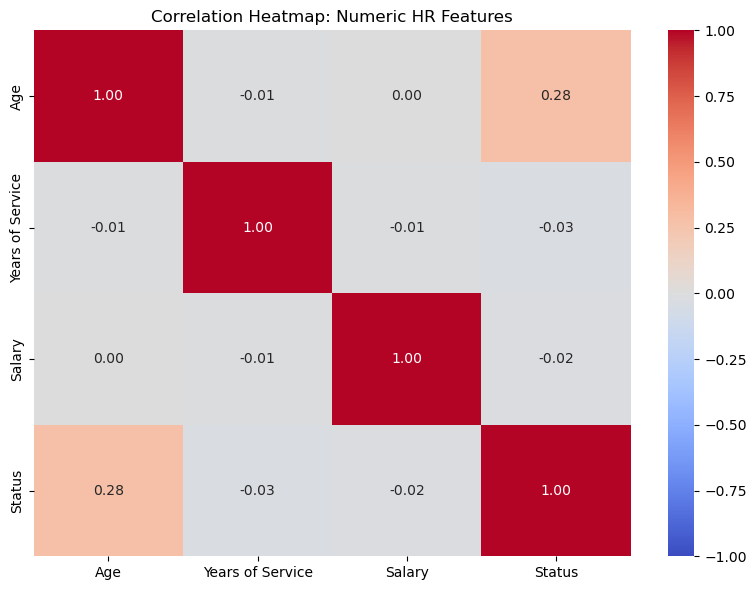

In [172]:
# Select only numeric features including the target 'Status'
corr_df = df[['Age', 'Years of Service', 'Salary', 'Status']]

# Compute the correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Numeric HR Features')
plt.tight_layout()
plt.show()

The correlation heatmap reveals a weak positive correlation (0.28) between Age and Exit Status, indicating that older employees may have a slightly higher tendency to leave the company. In contrast, Years of Service (–0.03) and Salary (–0.02) show negligible correlation with exit status, suggesting that these variables do not exhibit a clear linear relationship with employee attrition in this dataset.

### 3.2 Class Distribution

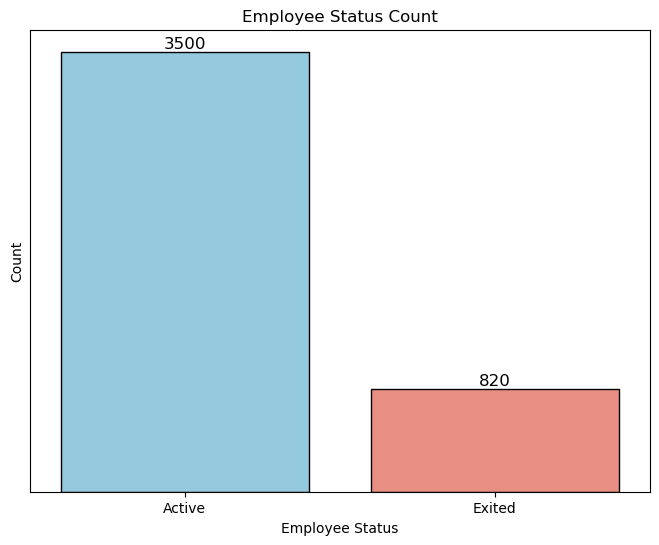

In [173]:
# Create a copy of your DataFrame for labeling
status_df = df.copy()
status_df['Status'] = status_df['Status'].replace({0: 'Active', 1: 'Exited'})

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=status_df,
    x='Status',
    hue='Status',
    palette={'Active': 'skyblue', 'Exited': 'salmon'},
    edgecolor='black',
    legend=False
)

plt.title('Employee Status Count')
plt.xlabel('Employee Status')
plt.ylabel('Count')
plt.yticks([])

# Label both bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()

### Employee Status Count

The chart shows that the majority of employees are still active (3,500), while a smaller portion (820) have exited. This imbalance highlights the need to address class imbalance during modeling.

In [174]:
# 🔄 Create a working copy of the dataset for model preprocessing and transformation
# Encode data early just for SMOTE visualization
df_model = df.copy()
df_model_encoded = pd.get_dummies(df_model, drop_first=True)
# Convert all non-object columns safely to float64
for col in df_model_encoded.select_dtypes(include=['Int64', 'int64']).columns:
    df_model_encoded[col] = df_model_encoded[col].astype(float)
df_model_encoded = df_model_encoded.drop(columns=['Date of Exit'], errors='ignore')

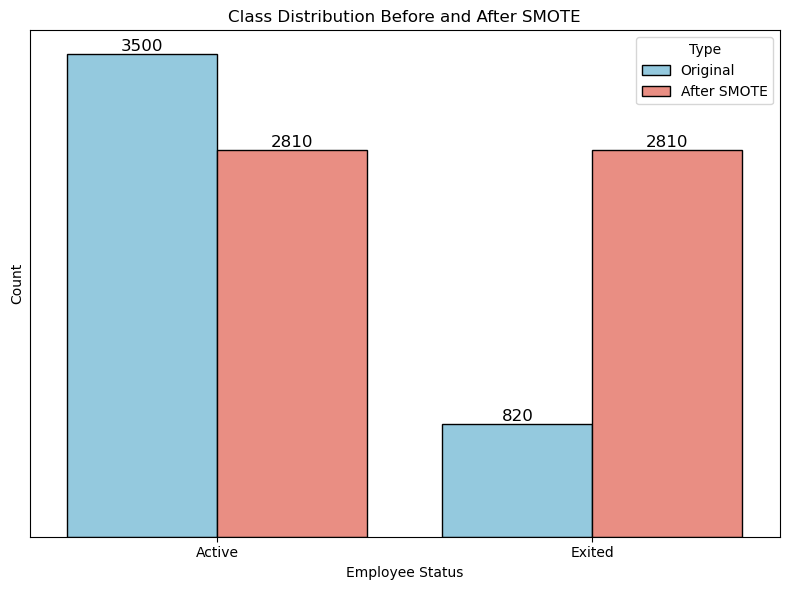

In [175]:
# 🔁 Resampling to Address Class Imbalance

# Define features and target
X = df_model_encoded.drop('Status', axis=1)
y = df_model_encoded['Status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Prepare labeled count DataFrame for visualization
# Step 3: Prepare DataFrame with correct original values (from full y)
def label_counts(y_vals, label):
    counter = Counter(y_vals)
    df = pd.DataFrame.from_dict(counter, orient='index', columns=['Count'])
    df['Status'] = df.index.map({0: 'Active', 1: 'Exited'})
    df['Type'] = label
    return df.reset_index(drop=True)

df_before = label_counts(y, 'Original')
df_after = label_counts(y_train_sm, 'After SMOTE')
df_combined = pd.concat([df_before, df_after])


# Themed bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_combined,
    x='Status',
    y='Count',
    hue='Type',
    palette={'Original': 'skyblue', 'After SMOTE': 'salmon'},
    edgecolor='black'
)

plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('Employee Status')
plt.ylabel('Count')
plt.yticks([])

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.legend(title='Type')
plt.tight_layout()
plt.show()

The chart above shows how SMOTE was used to address the original class imbalance between active and exited employees. The original dataset had 3,500 active staff and only 820 exited staff. SMOTE was applied to the training set, resulting in a balanced sample of 2,810 per class. This helps improve the model's ability to detect patterns in the minority class (exited staff).

## **4. Data Preprocessing**
----

In [176]:
# One-hot encode categorical features
df_model_encoded = pd.get_dummies(df_model, drop_first=True)

In [177]:
# Drop columns with 'exit', 'reason', or 'date'
leak_cols = df_model_encoded.columns[df_model_encoded.columns.str.contains("exit|reason|date", case=False)]
df_model_encoded = df_model_encoded.drop(columns=leak_cols)

In [178]:
# Split features (X) and target (y)
X = df_model_encoded.drop('Status', axis=1)
y = df_model_encoded['Status']

In [179]:
# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Convert train to data type
X_train = X_train.astype(float)
y_train = y_train.astype(int)

In [180]:
# Apply SMOTE to Training Data ONLY
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [181]:
# Scale Numeric Features
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [182]:
X_train_sm_scaled = pd.DataFrame(X_train_sm_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## **5. Model Training and Evaluation**
---

### Train a Logistic Regression model

In [183]:

# Apply SMOTE to handle imbalance
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_sm_scaled, y_train_sm)

LogisticRegression(random_state=42)

### Make Predictions

In [184]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

### Evaluate Using Accuracy, Confusion Matrix, and Classification Report

Logistic Regression Accuracy: 0.63
--------------------------------------------------

Confusion Matrix:
 [[436 254]
 [ 65 109]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.63      0.73       690
           1       0.30      0.63      0.41       174

    accuracy                           0.63       864
   macro avg       0.59      0.63      0.57       864
weighted avg       0.76      0.63      0.67       864



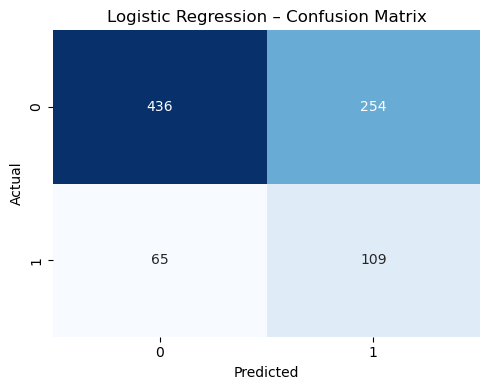

In [185]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print('-' * 50)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Confusion Matrix")
plt.tight_layout()
plt.show()

### Train a Random Forest model

In [186]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train_sm_scaled, y_train_sm)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

Random Forest Accuracy: 0.87
--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       690
           1       1.00      0.37      0.54       174

    accuracy                           0.87       864
   macro avg       0.93      0.69      0.74       864
weighted avg       0.89      0.87      0.85       864

Confusion Matrix:
 [[690   0]
 [109  65]]


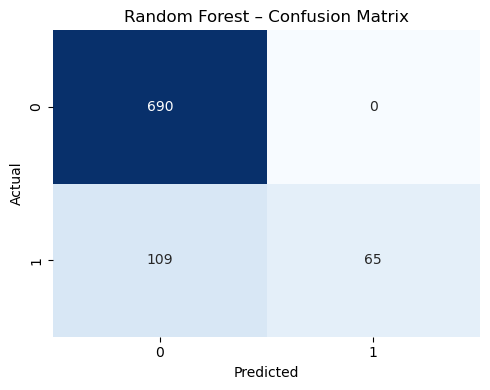

In [187]:
y_pred_rf = rf_model.predict(X_test_scaled)

# Precision Score for Exited Class (1)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print('-' * 50)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Heatmap Plot
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest – Confusion Matrix")
plt.tight_layout()
plt.show()

### Train using Threshold Tuning model

In [188]:
# Get probability estimates for Class 1 (Exited)
y_probs_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [189]:
thresholds = np.arange(0.1, 0.9, 0.05)

print(f"{'Threshold':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 40)

for thresh in thresholds:
    y_pred_thresh = (y_probs_rf >= thresh).astype(int)
    
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
    
    print(f"{thresh:<10.2f} {precision:<10.2f} {recall:<10.2f} {f1:<10.2f}")

Threshold  Precision  Recall     F1-Score  
----------------------------------------
0.10       0.20       1.00       0.34      
0.15       0.21       0.98       0.35      
0.20       0.24       0.87       0.37      
0.25       0.34       0.72       0.46      
0.30       0.60       0.50       0.55      
0.35       0.85       0.39       0.54      
0.40       0.99       0.38       0.55      
0.45       1.00       0.37       0.54      
0.50       1.00       0.37       0.54      
0.55       1.00       0.37       0.54      
0.60       1.00       0.37       0.54      
0.65       1.00       0.37       0.54      
0.70       1.00       0.36       0.53      
0.75       1.00       0.35       0.52      
0.80       1.00       0.32       0.48      
0.85       1.00       0.24       0.39      


Random Forest Accuracy at Threshold 0.55: 0.87
--------------------------------------------------

Classification Report at Threshold 0.55
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       690
           1       1.00      0.37      0.54       174

    accuracy                           0.87       864
   macro avg       0.93      0.69      0.74       864
weighted avg       0.89      0.87      0.85       864



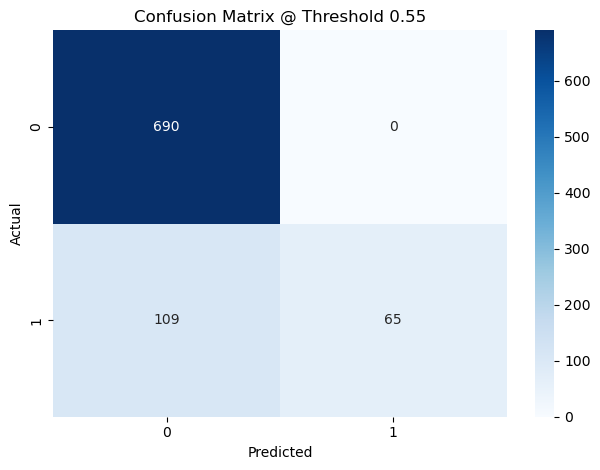

In [190]:
optimal_threshold = 0.55
y_pred_opt = (y_probs_rf >= optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_thresh = accuracy_score(y_test, y_pred_opt)
print(f"Random Forest Accuracy at Threshold {optimal_threshold}: {accuracy_thresh:.2f}")
print("--" * 25)

print("\nClassification Report at Threshold", optimal_threshold)
print(classification_report(y_test, y_pred_opt))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_opt), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix @ Threshold {optimal_threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### Train using SMOTE (Synthetic Minority Oversampling Technique) model

In [191]:
!pip install imbalanced-learn

In [192]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_fe_sm, y_train_fe_sm = smote.fit_resample(X_train_sm, y_train_sm)

In [193]:
rf_fe_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf_fe_model.fit(X_train_fe_sm, y_train_fe_sm)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [194]:
y_pred_fe = rf_fe_model.predict(X_test_fe)

accuracy_fe = accuracy_score(y_test_fe, y_pred_fe)
print(f"Random Forest Accuracy with Feature Engineering + SMOTE: {accuracy_fe:.2f}")
print('-' * 60)
print("Classification Report:\n")
print(classification_report(y_test_fe, y_pred_fe))

# --- Confusion Matrix ---
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_fe, y_pred_fe), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix – Random Forest (Feature Eng. + SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

NameError: name 'X_test_fe' is not defined

## Feature Engineering

In [ ]:
# Age and Salary Binning
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70],
                         labels=['20s', '30s', '40s', '50s', '60+'], right=False)

df['Salary_Band'] = pd.cut(df['Salary'], bins=[0, 200, 300, 400, 500, 1000],
                           labels=['<200', '200-299', '300-399', '400-499', '500+'], right=False)

# Drop leakage and redundant columns
cols_to_drop = ['Mode of Exit', 'Reasons For Exit', 'Date of Exit', 'Age', 'Salary']
df_fe = df.drop(columns=cols_to_drop).copy()

# One-hot encoding
df_fe = pd.get_dummies(df_fe, drop_first=True)

X_fe = df_fe.drop('Status', axis=1)
y_fe = pd.to_numeric(df_fe['Status'], errors='coerce').fillna(0).astype(int)  # Ensure clean int target

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, test_size=0.2, random_state=42
)

X_train_fe = X_train_fe.astype(float)   
y_train_fe = y_train_fe.astype(int)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_fe_sm, y_train_fe_sm = smote.fit_resample(X_train_fe, y_train_fe)

# Train Random Forest
rf_fe_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf_fe_model.fit(X_train_fe_sm, y_train_fe_sm)

# Step 7: Predict and Evaluate
y_pred_fe = rf_fe_model.predict(X_test_fe)

accuracy_fe = accuracy_score(y_test_fe, y_pred_fe)
print(f"Random Forest Accuracy with Feature Engineering + SMOTE: {accuracy_fe:.2f}")
print('-' * 55)
print(classification_report(y_test_fe, y_pred_fe))

# Step 8: Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_fe, y_pred_fe), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix – Feature Engineered RF with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## Train XGBoost for Exit Prediction

In [ ]:
!pip install xgboost

In [ ]:
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

# Train on SMOTE-balanced data
xgb_model.fit(X_train_fe_sm, y_train_fe_sm)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_fe)

accuracy_xgb = accuracy_score(y_test_fe, y_pred_xgb)
print(f"XGBoost Accuracy (SMOTE): {accuracy_xgb:.2f}")
print('-' * 30)
print(classification_report(y_test_fe, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_fe, y_pred_xgb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBoost – Confusion Matrix (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## **6. Analysis Section**
---

#### Feature Importance using model coefficients

In [ ]:
# Get feature importance from trained Random Forest
importances = pd.Series(
    rf_fe_model.feature_importances_,
    index=X_train_fe.columns  # original feature names before SMOTE
).sort_values()

# Select top 15 most important features
top_features = importances.tail(15)

# Create a blue gradient color palette
gradient_blues = sns.color_palette("Blues", n_colors=len(top_features))

# Plot
plt.figure(figsize=(10, 8))
ax = top_features.plot(kind='barh', color=gradient_blues)

# Customize plot
plt.title('Top Factors Influencing Exit (Random Forest + SMOTE)', fontsize=14)
plt.xlabel("")
plt.xticks([])
plt.grid(False)

# Add data labels
for bar, val in zip(ax.patches, top_features):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Look for suspicious columns
X.columns[X.columns.str.contains("exit|reason|date", case=False)]


#### Age Ranges and Exit Probability

In [ ]:
# Define age bins and labels
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60+']

# Create Age Range column
df['Age_Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age Range and calculate exit rate
exit_by_age = df.groupby('Age_Range', observed=True)['Status'].value_counts(normalize=True).unstack()

# Show only exit rate (Status = 1)
exit_rate_age = exit_by_age[1] * 100
print("Exit rate by Age Range (%):")
print(exit_rate_age)

In [ ]:
print("\nCOMMENTS (by Age Range):")
for age_group, rate in exit_rate_age.sort_values(ascending=False).items():
    print(f"- Employees aged {age_group} have a {rate:.2f}% exit rate.")

#### Salary Ranges and Exit Probability

In [ ]:
# Define salary bins and labels
salary_bins = [0, 200, 300, 400, 500, 1000]
salary_labels = ['<200', '200-299', '300-399', '400-499', '500+']

# Create Salary Range column
df['Salary_Range'] = pd.cut(df['Salary'], bins=salary_bins, labels=salary_labels, right=False)

# Group by Salary Range and calculate exit rate
exit_by_salary = df.groupby('Salary_Range', observed=True)['Status'].value_counts(normalize=True).unstack()

# Show only exit rate (Status = 1)
exit_rate_salary = exit_by_salary[1] * 100
print("Exit rate by Salary Range (%):")
print(exit_rate_salary)

In [ ]:
print("\nCOMMENTS (by Salary Range):")
for salary_group, rate in exit_rate_salary.sort_values(ascending=False).items():
    print(f"- Employees earning {salary_group} have a {rate:.2f}% exit rate.")

#### Exit Rate by Department

In [ ]:
# Group by Department and calculate normalized status counts
exit_by_dept = df.groupby('Department', observed=True)['Status'].value_counts(normalize=True).unstack()

# Get the percentage of employees who exited (Status = 1)
exit_rate_dept = exit_by_dept[1] * 100

# Display the results
print("Exit Rate by Department (%):")
print(exit_rate_dept.sort_values(ascending=False))

In [ ]:
print("\nCOMMENTS:")
for dept, rate in exit_rate_dept.sort_values(ascending=False).items():
    print(f"- Employees in the {dept} department have a {rate:.2f}% exit rate.")


## **7. Predicting Employees Likely to Exit in the Next 6 Months**
---

#### This section uses the trained Random Forest + SMOTE model to identify employees with a high probability of exiting the company within the next 6 months, based on historical patterns and tenure.

In [ ]:
# Predict probabilities using the Random Forest + SMOTE model
y_proba_rf = rf_fe_model.predict_proba(X_test_fe)
exit_probs = y_proba_rf[:, 1]

In [ ]:
# Prepare watchlist dataframe
watchlist = X_test_fe.copy()
watchlist['Exit_Probability'] = exit_probs
watchlist['Actual_Status'] = y_test_fe.values

In [ ]:
# Flag employees at risk of exit (next 6 months proxy)
watchlist['Likely_to_Exit_6_Months'] = watchlist['Exit_Probability'] >= 0.60

In [ ]:
# View the highest risk employees first
high_risk = watchlist[watchlist['Likely_to_Exit_6_Months'] == True].sort_values(by='Exit_Probability', ascending=False)

# Show top 10
high_risk.head(10)

In [ ]:
# Merge with original employee info (df)
watchlist_named = df.merge(
    watchlist[['Exit_Probability', 'Likely_to_Exit_6_Months']],
    left_index=True, right_index=True, how='right'
)

# Filter and sort high-risk predictions
high_risk_named = watchlist_named[watchlist_named['Likely_to_Exit_6_Months'] == True]\
    .sort_values(by='Exit_Probability', ascending=False)

# Display key details
high_risk_named[['Job Title', 'Department', 'Age', 'Years of Service', 'Salary', 'Exit_Probability']].head(10)

In [ ]:
print("\nCOMMENTS (High-Risk Exit Prediction):")
for _, row in high_risk_named.head(10).iterrows():
    print(f"- {row['Job Title']} from {row['Department']} department "
          f"(Age {row['Age']}, {row['Years of Service']} yrs of service) has a "
          f"{row['Exit_Probability']*100:.1f}% likelihood of exiting.")

## **8. Predicting Exit Probabilities for New Hires**
---

#### Create Sample New Hire Data

In [ ]:
# Sample of Active Employee Data (Simulated New Hires)
# Filter only active employees with <= 2 years of service
new_hires_df = df[(df['Status'] == 0) & (df['Years of Service'] <= 2)].copy()

# Randomly select 10 of them
sample_active = new_hires_df.sample(n=20, random_state=42)

# View the selected sample
sample_active[['Job Title', 'Department', 'Age', 'Years of Service', 'Salary']].reset_index(drop=True)

#### Preprocess

In [ ]:
# Drop columns not used for training
cols_to_drop = ['Mode of Exit', 'Reasons For Exit', 'Date of Exit', 'Age', 'Salary']
sample_fe = sample_active.drop(columns=cols_to_drop).copy()

# Recreate engineered features
sample_fe['Age_Group'] = pd.cut(sample_active['Age'], bins=[20, 30, 40, 50, 60, 70],
                                labels=['20s', '30s', '40s', '50s', '60+'], right=False)

sample_fe['Salary_Band'] = pd.cut(sample_active['Salary'], bins=[0, 200, 300, 400, 500, 1000],
                                  labels=['<200', '200-299', '300-399', '400-499', '500+'], right=False)

# One-hot encode the sample
sample_encoded = pd.get_dummies(sample_fe, drop_first=True)

# Ensure all columns match the training set
missing_cols = set(X_train_fe.columns) - set(sample_encoded.columns)
for col in missing_cols:
    sample_encoded[col] = 0

# Reorder columns to match training structure
sample_encoded = sample_encoded[X_train_fe.columns]

#### Predict Exit Probabilities

In [ ]:
# Predict exit probabilities
sample_probs = rf_fe_model.predict_proba(sample_encoded)[:, 1]

# Add predictions to the original sample
sample_active['Exit_Probability (%)'] = (sample_probs * 100).round(2)

# Display results
sample_active[['Job Title', 'Department', 'Age', 'Years of Service', 'Salary', 'Exit_Probability (%)']]

In [ ]:
print("\nCOMMENTS (Exit Probabilities for Sample Active Employees):")
for _, row in sample_active.iterrows():
    print(f"- {row['Job Title']} in {row['Department']} (Age {row['Age']}, "
          f"{row['Years of Service']} yrs of service): {row['Exit_Probability (%)']}% chance of exit")

In [ ]:
import seaborn as sns

# Sort the sample by exit probability (ascending)
new_hires_sorted = sample_active.sort_values(by='Exit_Probability (%)', ascending=True).copy()

# Create unique label per employee
new_hires_sorted['Label'] = (
    new_hires_sorted['Job Title'].astype(str) + " (" +
    new_hires_sorted['Department'].astype(str) + ", Age " +
    new_hires_sorted['Age'].astype(str) + ")"
)

# Generate a red gradient: light (low risk) → dark (high risk)
reds = sns.color_palette("Reds", n_colors=len(new_hires_sorted))

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(
    new_hires_sorted['Label'],
    new_hires_sorted['Exit_Probability (%)'],
    color=reds
)

plt.title("Exit Probability (%) for Sampled New Hires (Real Employees)")
plt.xlabel("Exit Probability (%)")
plt.grid(False)
plt.tight_layout()
plt.show()

## **9: Final Summary & HR Recommendations**
---

### **🧾 Summary of Findings:**
#### This project explored the employee records of Alpha Network Limited to uncover key patterns influencing staff attrition. Using Python-based data analysis and a Random Forest model trained on SMOTE-balanced data, we were able to:

- Identify departments, age groups, and salary ranges with higher exit rates.

- Train a predictive model that flags employees likely to exit within the next 6 months.

- Calculate personalized exit probabilities for new hires before onboarding.

- Provide data-driven insights to support strategic workforce planning and retention.

### 📌 Key HR Recommendations:
- Monitor High-Risk Age Groups: Employees aged 50 and above demonstrated the highest likelihood of exit. HR should prioritize retention strategies for this group, including flexible work arrangements and phased retirement plans.

- Focus on At-Risk Departments: Departments such as Billing, Data Analytics, and Sales & Marketing exhibited elevated exit rates. HR should conduct targeted exit interviews and employee satisfaction surveys within these units to uncover and address root causes.

- Support New Hires with Elevated Exit Risk: Active employees with fewer than two years of service and a predicted exit probability above 40% should receive tailored onboarding support, mentoring, and regular engagement to improve retention outcomes.

- Address Salary-Linked Attrition: Employees in the lowest salary bands (below 300) were more prone to exit. HR should consider reviewing pay structures or introducing non-monetary benefits to retain early-career staff.

- Integrate Predictive Analytics into HR Planning: The developed Random Forest + SMOTE model can be embedded into HR workflows to proactively flag high-risk individuals and inform data-driven decisions around hiring, onboarding, and engagement.
